<p dir="ltr"><span style="font-size: x-large; font-family: 'arial black', 'avant garde';"><strong>Imports</strong></span></p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point,LineString
import requests
import json
import seaborn as sns
import mapclassify as mc
%matplotlib inline

<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">
<p class="Paragraph SCXW199277455 BCX0"><strong><span class="TextRun SCXW199277455 BCX0" style="font-family: 'arial black', 'avant garde'; font-size: x-large;" lang="EN-US" xml:lang="EN-US" data-contrast="auto">Load Data&nbsp;</span></strong><span class="EOP SCXW199277455 BCX0" data-ccp-props="{&quot;201341983&quot;:0,&quot;335559739&quot;:160,&quot;335559740&quot;:259}">&nbsp;</span></p>
<p class="Paragraph SCXW199277455 BCX0"><span class="TextRun SCXW199277455 BCX0" style="font-family: 'times new roman', times; font-size: large;" lang="EN-US" xml:lang="EN-US" data-contrast="auto" data-mce-mark="1">load track ids from envirocar API</span><span class="EOP SCXW199277455 BCX0" style="font-family: 'times new roman', times; font-size: large;" data-ccp-props="{&quot;201341983&quot;:0,&quot;335559739&quot;:160,&quot;335559740&quot;:259}" data-mce-mark="1"><p><em>url = 'https://envirocar.org/api/stable/rest/tracks?limit={limit}&amp;page={page}'</em></p>&nbsp;</span></p>
</div>


In [33]:
def load_track_ids(limit = 100 , page = 0):
    
    #empty pandas dataframe
    data = pd.DataFrame()
    
    #add a column to store track_ids
    data['track_ids'] = None
    
    list_of_trackids = []
    
    url = 'https://envirocar.org/api/stable/rest/tracks' + '?limit=' + str(limit) + '&page=' + str(page)
    df = pd.read_json(url)
    
    #iterate through the rows of the dataframe and add track ids to the list_of_track_ids.
    for ind,row in df.iterrows():
        list_of_trackids.append(row['tracks']['id'])
    
    data['track_ids'] = list_of_trackids
    
    return data

<div class="OutlineElement Ltr  BCX0 SCXW199277455">
    <div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<p class="Paragraph SCXW199277455 BCX0"><strong><span class="TextRun SCXW199277455 BCX0" style="font-family: 'arial black', 'avant garde'; font-size: x-large;" lang="EN-US" xml:lang="EN-US" data-contrast="auto">View track ids</span></strong></p>
</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>

In [34]:
#store the tracks ids in a pandas data frame called tracks
tracks = load_track_ids(limit = 100)

#display first five tracks
tracks.head()

,track_ids
0,5c9b0b6d44ea85030284ee9d
1,5c9551a444ea850302f9c643
2,5c9551a144ea850302f9c213
3,5c95155944ea850302f58228
4,5c950f9e44ea850302f542ef



<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">
<p class="Paragraph SCXW199277455 BCX0"><span style="font-size: x-large; font-family: 'arial black', 'avant garde';"><span style="font-size: x-large; font-family: 'arial black', 'avant garde';"><strong><span style="font-size: x-large; font-family: 'arial black', 'avant garde';">Loading data from a single track</span></strong></span></span></p>
</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<p><span style="font-family: 'times new roman', times; font-size: 14pt;">Load a single track information from url </span>: <span style="font-size: 12pt;"><em><span style="font-family: 'times new roman', times;">'https://envirocar.org/api/stable/rest/tracks/{track-id}'</span></em></span></p>

In [3]:
def import_single_track_info(track_id):
   
    url = 'https://envirocar.org/api/stable/rest/tracks/' + str(track_id) + '.csv'
    data = pd.read_csv(url , sep =  ';')
    
    return data    

In [4]:
#view a single track information
single_track = import_single_track_info('5c94c14a44ea850302f2d7db')
single_track.head()


,id,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),GPS Bearing(deg),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude,time
0,5c94c14a44ea850302f2d7dd,7.933088,117.045541,0.648467,355.788510098233,3.375782,25.192772,20.578028,1325.203994,23.000000,0.700000,93.447799,1.000000,3.0,49.999999,10.269411,88.077680,7.784031,51.638390,2019-03-22T10:30:52Z
1,5c94c14a44ea850302f2d7df,6.774519,116.000000,0.707867,344.54927691928606,2.882774,37.729168,37.024022,1443.735099,16.050671,0.753934,73.022123,1.053934,3.0,49.000000,8.769639,67.033366,7.783869,51.638790,2019-03-22T10:30:57Z
2,5c94c14a44ea850302f2d7e0,3.669429,118.000004,0.648622,346.6744517099942,1.561459,41.000001,40.785476,1538.544485,11.000000,0.700000,37.000001,1.000000,3.0,48.000001,4.750089,30.980392,7.783660,51.639279,2019-03-22T10:31:02Z
3,5c94c14a44ea850302f2d7e1,4.413799,116.000000,0.700000,347.45083443865406,1.878212,38.030657,38.541314,1479.178448,12.112266,0.746502,46.291925,1.046502,3.0,48.000000,5.713678,40.802304,7.783462,51.639775,2019-03-22T10:31:07Z
4,5c94c14a44ea850302f2d7e2,10.072983,117.498510,0.645075,350.651036620442,4.286376,45.086820,42.968196,1689.919655,24.000001,0.745075,92.470960,0.990149,3.0,48.000000,13.039513,86.245674,7.783314,51.640286,2019-03-22T10:31:12Z


In [37]:
#view variable types
single_track.dtypes

id                         object
 CO2(kg/h)                float64
 GPS Altitude(m)          float64
 GPS HDOP(precision)      float64
 GPS Bearing(deg)          object
 Consumption(l/h)         float64
 Speed(km/h)              float64
 GPS Speed(km/h)          float64
 Rpm(u/min)               float64
 Throttle Position(%)     float64
 GPS VDOP(precision)      float64
 Intake Pressure(kPa)     float64
 GPS PDOP(precision)      float64
 GPS Accuracy(%)          float64
 Intake Temperature(c)    float64
 Calculated MAF(g/s)      float64
 Engine Load(%)           float64
 longitude                float64
 latitude                 float64
 time                      object
dtype: object


<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">
<p class="Paragraph SCXW199277455 BCX0"><strong style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><span style="font-size: x-large; font-family: 'arial black', 'avant garde';" data-mce-mark="1">Prepare data</span></strong></p>
</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>

In [38]:
#change time to datetime
single_track[' time'] = pd.to_datetime(single_track[' time'] ,format = '%Y-%m-%dT%H:%M:%S')

#show data
single_track.head()

,id,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),GPS Bearing(deg),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude,time
0,5c94c14a44ea850302f2d7dd,7.933088,117.045541,0.648467,355.788510098233,3.375782,25.192772,20.578028,1325.203994,23.000000,0.700000,93.447799,1.000000,3.0,49.999999,10.269411,88.077680,7.784031,51.638390,2019-03-22 10:30:52
1,5c94c14a44ea850302f2d7df,6.774519,116.000000,0.707867,344.54927691928606,2.882774,37.729168,37.024022,1443.735099,16.050671,0.753934,73.022123,1.053934,3.0,49.000000,8.769639,67.033366,7.783869,51.638790,2019-03-22 10:30:57
2,5c94c14a44ea850302f2d7e0,3.669429,118.000004,0.648622,346.6744517099942,1.561459,41.000001,40.785476,1538.544485,11.000000,0.700000,37.000001,1.000000,3.0,48.000001,4.750089,30.980392,7.783660,51.639279,2019-03-22 10:31:02
3,5c94c14a44ea850302f2d7e1,4.413799,116.000000,0.700000,347.45083443865406,1.878212,38.030657,38.541314,1479.178448,12.112266,0.746502,46.291925,1.046502,3.0,48.000000,5.713678,40.802304,7.783462,51.639775,2019-03-22 10:31:07
4,5c94c14a44ea850302f2d7e2,10.072983,117.498510,0.645075,350.651036620442,4.286376,45.086820,42.968196,1689.919655,24.000001,0.745075,92.470960,0.990149,3.0,48.000000,13.039513,86.245674,7.783314,51.640286,2019-03-22 10:31:12


In [39]:
#set time as index
single_track.set_index(' time' , inplace = True)

#show track information
single_track.head()

,id,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),GPS Bearing(deg),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude
time,,,,,,,,,,,,,,,,,,,
2019-03-22 10:30:52,5c94c14a44ea850302f2d7dd,7.933088,117.045541,0.648467,355.788510098233,3.375782,25.192772,20.578028,1325.203994,23.000000,0.700000,93.447799,1.000000,3.0,49.999999,10.269411,88.077680,7.784031,51.638390
2019-03-22 10:30:57,5c94c14a44ea850302f2d7df,6.774519,116.000000,0.707867,344.54927691928606,2.882774,37.729168,37.024022,1443.735099,16.050671,0.753934,73.022123,1.053934,3.0,49.000000,8.769639,67.033366,7.783869,51.638790
2019-03-22 10:31:02,5c94c14a44ea850302f2d7e0,3.669429,118.000004,0.648622,346.6744517099942,1.561459,41.000001,40.785476,1538.544485,11.000000,0.700000,37.000001,1.000000,3.0,48.000001,4.750089,30.980392,7.783660,51.639279
2019-03-22 10:31:07,5c94c14a44ea850302f2d7e1,4.413799,116.000000,0.700000,347.45083443865406,1.878212,38.030657,38.541314,1479.178448,12.112266,0.746502,46.291925,1.046502,3.0,48.000000,5.713678,40.802304,7.783462,51.639775
2019-03-22 10:31:12,5c94c14a44ea850302f2d7e2,10.072983,117.498510,0.645075,350.651036620442,4.286376,45.086820,42.968196,1689.919655,24.000001,0.745075,92.470960,0.990149,3.0,48.000000,13.039513,86.245674,7.783314,51.640286


<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>

<div class="OutlineElement Ltr  BCX0 SCXW199277455">
<p class="Paragraph SCXW199277455 BCX0"><strong style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><span style="font-size: x-large; font-family: 'arial black', 'avant garde';" data-mce-mark="1">Descriptive statistics</span></strong></p>
</div>
<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>

In [40]:
single_track.describe()

,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,4.236311,107.971269,0.772035,1.802686,30.403843,30.474224,1489.096481,10.544915,0.771509,41.815287,1.088785,3.620264,39.935392,5.483920,36.030714,7.795974,51.663584
std,2.449472,5.327729,0.151306,1.042328,20.556046,20.556177,497.574962,5.085983,0.056383,16.135115,0.146686,1.694077,2.730771,3.170850,16.485142,0.021121,0.010872
min,1.678396,84.672818,0.600000,0.714211,0.000000,0.000000,724.372383,6.000000,0.656495,19.000001,0.900000,3.000000,37.866594,2.172689,13.224165,7.766394,51.638390
25%,1.965540,104.000000,0.700000,0.836400,11.046610,11.967621,878.388603,6.000000,0.716323,33.074386,1.000000,3.000000,38.000001,2.544399,27.748399,7.780690,51.654285
50%,3.612779,108.000000,0.725990,1.537353,35.949626,35.504763,1660.116781,9.988124,0.800000,36.000000,1.067674,3.000000,39.000000,4.676755,30.517959,7.788278,51.666335
75%,5.373619,111.743810,0.827725,2.286647,47.787896,48.197481,1862.313101,14.000000,0.800000,46.765662,1.153515,3.602743,39.000001,6.956169,40.431714,7.816956,51.672246
max,11.652228,118.252815,2.118838,4.958395,68.000002,68.305263,2496.670805,27.785714,0.979137,95.000001,2.376954,20.345640,49.999999,15.083850,88.568030,7.829048,51.675645


<p>&nbsp;</p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">Visualizing correlation between different variables</span></em></p>


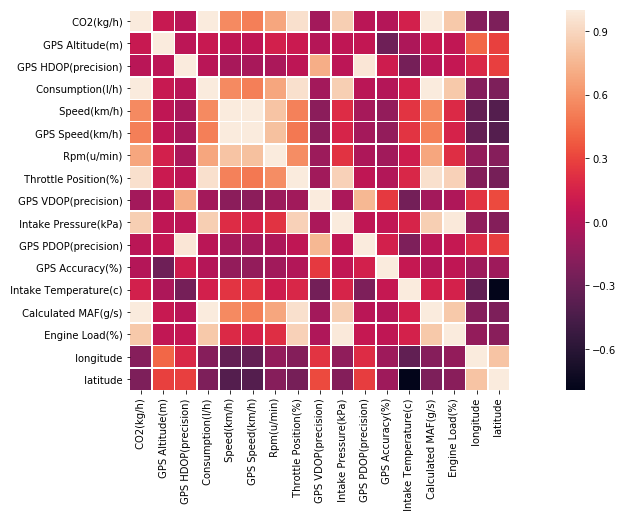

In [41]:
#This shows the correlation between all variables
single_track_cor = single_track[single_track.columns]
cor = single_track_cor.corr()
plt.figure(figsize = (20,7))
sns.heatmap(cor , square = True , linewidth = 0.5)
plt.show()

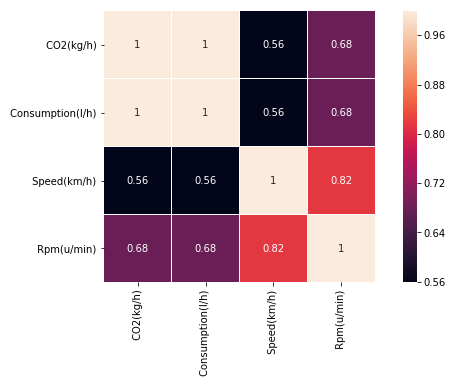

In [42]:
#correlation between specified variables
single_track_cor = single_track[[' CO2(kg/h)', ' Consumption(l/h)' , ' Speed(km/h)' , ' Rpm(u/min)']]
cor = single_track_cor.corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor , square = True ,annot = True ,  linewidth = 0.5)
plt.show()


<p><em><span style="font-family: 'times new roman', times; font-size: large;">from the above heatmap we can easily say that their is a high relation between CO2 emission and fuel consumption and these two are less related with the speed.</span></em></p>

<p id="Visualise-tracks-on-a-map">&nbsp;</p>

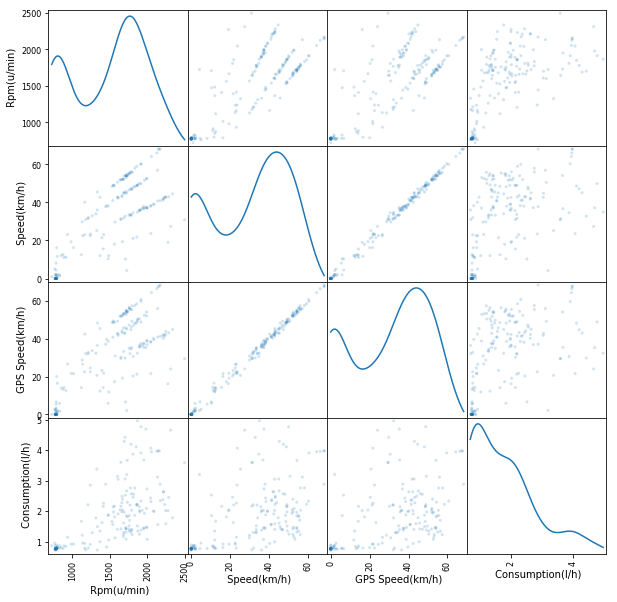

In [43]:
#another way to visualize the correlation between different variables 
scatter_matrix = pd.plotting.scatter_matrix(single_track[[' Rpm(u/min)',' Speed(km/h)', ' GPS Speed(km/h)', ' Consumption(l/h)']], alpha=0.2, figsize=(10,10) , diagonal = 'kde')

#show plot
plt.show()

<div class="OutlineElement Ltr  BCX0 SCXW199277455">&nbsp;</div>
<p id="Looking-at-the-above-scatter-matrix,we-can-say-that-the-relation-between-Speed-and-GPS-speed-is-almost-linear-and-conclusions-regarding-the-accuracy-of-GPS-can-be-drawn.Similarly-the-realation-between-other-attributes-can-also-be-known."><span style="font-size: large;"><em><span style="font-family: 'times new roman', times;">Looking at the above scatter matrix,we can say that the relation between Speed and GPS speed is almost linear and conclusions regarding the accuracy of GPS can be drawn.Similarly the realation between other attributes can also be known</span></em></span></p>

<p>&nbsp;</p>
<p id="Visualize-tracks-on-a-map"><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><strong>Visualize tracks on a map</strong></span></p>
<p id="Looking-at-the-above-scatter-matrix,we-can-say-that-the-relation-between-Speed-and-GPS-speed-is-almost-linear-and-conclusions-regarding-the-accuracy-of-GPS-can-be-drawn.Similarly-the-realation-between-other-attributes-can-also-be-known."><span style="font-family: 'times new roman', times; font-size: large;"><em>&nbsp;</em></span></p>

In [44]:
def visualize_tracks(tracks):
   
    m = folium.Map(location = [51.1657 , 10.4515] ,  zoom_start = 7 , control_scale = True)
    
    for ind, row1 in tracks.iterrows():
        track_id = row1['track_ids']
        
       
        track_data = import_single_track_info(str(track_id))

        for ind, row in track_data.iterrows():
            folium.Marker(location = [row[' latitude'], row[' longitude'] ] , popup =track_id , tooltip = 'click to see track id').add_to(m)

    
    return m

In [45]:
#view a single track on map
m = visualize_tracks(tracks[0:1])
m

In [46]:
#view more than one track
m = visualize_tracks(tracks[0:3])
m

<p>&nbsp;</p>
<p id="Visualize-tracks-on-a-map"><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><strong>Visualize tracks on a Heatmap</strong></span></p>

<p id="Looking-at-the-above-scatter-matrix,we-can-say-that-the-relation-between-Speed-and-GPS-speed-is-almost-linear-and-conclusions-regarding-the-accuracy-of-GPS-can-be-drawn.Similarly-the-realation-between-other-attributes-can-also-be-known."><span style="font-family: 'times new roman', times; font-size: large;"><em>&nbsp;</em></span></p>

In [47]:
def visualize_on_heatmap(tracks):
         
    m = folium.Map(location = [51.1657 , 10.4515] ,  zoom_start = 7 , control_scale = True)

    for ind,row  in tracks.iterrows():
        track_id = row['track_ids']
        
        track_data = import_single_track_info(track_id)
        points_arr = track_data[[' latitude' , ' longitude']].values
        
        HeatMap(points_arr).add_to(m)
        
    return m

In [48]:
#see a single track on heatmap
m = visualize_on_heatmap(tracks[0:1])
m

In [49]:
#visualize all tracks present in tracks dataframe on heatmap
m = visualize_on_heatmap(tracks[0:5])
m

<p>&nbsp;</p>
<p><span style="font-size: x-large; font-family: 'arial black', 'avant garde';"><strong>Map Matching</strong></span></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">The GPS traces obtained are not completely accurate and needs to be adjusted according to the underlying road network.map matching means snapping trajectories onto openstreetmap road segments with OSRM(open street routing machine)</span></em></p>
<p id="Visualise-tracks-on-a-map">&nbsp;</p>

<p><span style="font-size: m
large;"><em><span style="font-family: 'times new roman', times;">Get the mapped points using OSRM</span></em></span></p>
<p id="Visualise-tracks-on-a-map">&nbsp;</p>

In [50]:
#matching two sample GPS traces (6.484717467875837,51.22546715521443) and (6.484647742341846,51.22555184174763) in longitude, latitude format as specified in OSRM API documentation

url = 'http://router.project-osrm.org/match/v1/car/6.484717467875837,51.22546715521443;6.484647742341846,51.22555184174763?steps=true&overview=simplified'

response = requests.get(url)
mapped_data = json.loads(response.text)

mapped_data
#it is a dictionary

{'matchings': [{'confidence': 0.002211881110226077,
   'geometry': 'u~swH_qqf@GT',
   'legs': [{'summary': 'Krefelder Straße',
     'weight': 2.9,
     'duration': 2.9,
     'steps': [{'intersections': [{'out': 0,
         'entry': [True],
         'bearings': [300],
         'location': [6.484798, 51.225554]}],
       'driving_side': 'right',
       'geometry': 'u~swH_qqf@GT',
       'mode': 'driving',
       'maneuver': {'bearing_after': 300,
        'bearing_before': 0,
        'location': [6.484798, 51.225554],
        'modifier': 'left',
        'type': 'depart'},
       'weight': 2.9,
       'duration': 2.9,
       'name': 'Krefelder Straße',
       'distance': 8.9},
      {'intersections': [{'in': 0,
         'entry': [True],
         'bearings': [120],
         'location': [6.484687, 51.225594]}],
       'driving_side': 'right',
       'geometry': '}~swHipqf@',
       'mode': 'driving',
       'maneuver': {'bearing_after': 0,
        'bearing_before': 300,
        'location': [

In [51]:
for keys in mapped_data:
    print(keys)

matchings
tracepoints
code


In [52]:
#we have the mapped points in the location which is present in tracepoints key
mapped_data['tracepoints']

[{'alternatives_count': 0,
  'waypoint_index': 0,
  'matchings_index': 0,
  'hint': 'ZBLxCbMS8YkRAAAAIQAAAA0AAADfAQAAex4xQQkeH0HaFwBBvqoSQxEAAAAhAAAADQAAAN8BAACepgAAPvNiANKjDQPt8mIAe6MNAwEAjwfi9yx3',
  'distance': 11.211766846756614,
  'name': 'Krefelder Straße',
  'location': [6.484798, 51.225554]},
 {'alternatives_count': 7,
  'waypoint_index': 1,
  'matchings_index': 0,
  'hint': 'ZBLxCbMS8YkDAAAAPgAAAA0AAADfAQAA3FEIQEIVl0HaFwBBvqoSQwMAAAA-AAAADQAAAN8BAACepgAAz_JiAPqjDQOo8mIA0KMNAwEAjwfi9yx3',
  'distance': 5.408933232912566,
  'name': 'Krefelder Straße',
  'location': [6.484687, 51.225594]}]

In [53]:
#create an empty list to store the mapped points
mapped_points = []
for point in mapped_data['tracepoints']:
    mapped_points.append(point['location'])
    
#view mapped points
mapped_points

[[6.484798, 51.225554], [6.484687, 51.225594]]

In [54]:
#view on map the actual and mapped points  
m = folium.Map(location = [51.225554,6.484798] ,  control_scale = True , zoom_start = 18)

#actual points
folium.Marker(location = [51.22546715521443 , 6.484717467875837],icon = folium.Icon(color = 'red'),tooltip = 'GPS trace').add_to(m)
folium.Marker(location = [51.22555184174763 , 6.484647742341846],icon = folium.Icon(color = 'red'),tooltip = 'GPS trace').add_to(m)


folium.Marker(location = [51.225554,6.484798] ,icon = folium.Icon(color = 'blue') , tooltip= 'mapped point').add_to(m)
folium.Marker(location = [ 51.225594 , 6.484687] ,icon = folium.Icon(color = 'blue') , tooltip= 'mapped point').add_to(m)

m

<p><span style="font-family: 'times new roman', times; font-size: large;"><em>As we can see the GPS traces(in red) are snapped to the optimal road segment</em></span></p>


<p><span style="font-family: 'times new roman', times; font-size: large;">I have mapped only two points now.I intend to create a function that can map whole track during GSOC.</span></p>
<p id="Visualise-tracks-on-a-map">&nbsp;</p>

<p><span style="font-family: 'times new roman', times; font-size: large;"><em>Adding shapely linestrings to the tracks connecting all the points travelled in that track</em></span></p>
<p><span style="font-family: 'times new roman', times; font-size: large;">I haven't used this functionality(linestrings) further in the notebook,but believe that this may become handy in future.</span></p>

In [55]:
def add_linestring(tracks):
    #create an empty column
    tracks['polyline'] = None

    for ind, row in tracks.iterrows():
        #empty list fr storing shapely points present in a track.
        points = []

        track_id = row['track_ids']

        #load track information
        track_data = import_single_track_info(track_id)

        #loop throush track_data and append the shapely points to points list
        for ind_ , row_ in track_data.iterrows():
            points.append(Point(row_[' longitude'] ,row_[' latitude']))

        #add the linestring to tracks

        tracks.loc[ind , 'polyline'] = LineString(points)

In [56]:
add_linestring(tracks)

#view tracks
tracks.head()

,track_ids,polyline
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...


<p id="Visualise-tracks-on-a-map">&nbsp;</p>
<p><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><strong>Number of stops</strong></span></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">use trajectory data to calculate the number of stops in a track</span></em></p>

<ul>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Initialize a count variable to 0</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Loop through the measurements in that track, and increment by 1 the value of count if the speed is 0</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">If more than 1 consecutive measurements have speed equal to 0, then increment count only once</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">The final value of count will be the number of stops in that particular track.</span></p>
</li>
</ul>


In [57]:
#create a function to calculate the number of stops

def cal_number_of_stops(tracks):
    tracks['number_of_stops'] = None
    for i in range(len(tracks)):
        
        track_id = tracks.loc[i,'track_ids']
        track_data =  import_single_track_info(track_id)
        
        #variable to count the number of stops
        count = 0
        flag = False
        
        for ind,row in track_data.iterrows():
            
            if row[' Speed(km/h)'] == 0 and flag == False:
                flag = True
                count += 1
        
            elif row[' Speed(km/h)'] != 0:
                flag = False
                
        tracks.loc[i,'number_of_stops'] = count
        


In [58]:
cal_number_of_stops(tracks)
tracks.head()

,track_ids,polyline,number_of_stops
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14


<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Average stoptimes</span></strong></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">calculate stoptimes and avearge stoptimes</span></em></p>



<ul>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">First Importing single track information</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Then considering the speeds at different measurements of that particular track</span></p>
</li>
<li dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;"><span id="m_-7181412064515026148gmail-docs-internal-guid-7d3ff584-7fff-e347-842d-30701cd19e19">If 0&rsquo;s(value of speeds)</span> occur consecutively, then taking the difference of times of measurements containing the last 0 and the first 0</span></li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">This difference will be one stopping time.</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Continuing the above till we reach the end of the measurements.</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Now we have a list of stopping times in that track</span></p>
</li>
<li dir="ltr">
<p dir="ltr"><span style="font-family: 'times new roman', times; font-size: 14pt;">Taking average of those results in the average stopping time for that track</span></p>
</li>
</ul>
</li>
</ul>


In [59]:
#create a function to find out the stopping times as well as calculate the average stoptimes
def cal_avg_stoptimes(tracks):
    
    #create an  empty column to store the stopping times
    tracks['stoptimes'] = None
    
    #create an empty columnn to store the average stopping times
    tracks['avg_stoptime(sec)'] = None
 
    for i in range(len(tracks)):
        
        track_id = tracks.loc[i , 'track_ids']
        
        #print(track_id)
        track_data = import_single_track_info(track_id)
        
        #print(track_data.head())
        track_data[' time'] = pd.to_datetime(track_data[' time'] ,format = '%Y-%m-%dT%H:%M:%S')
        stoptimes = []
        previous = 0
        nxt = 0
        
        j = len(track_data)
        k=0

        while k < j:

            if track_data.iloc[k][' Speed(km/h)'] == 0:
                previous = k
                nxt = k

                while nxt+1 < j and track_data.iloc[nxt + 1][' Speed(km/h)'] == 0:
                     nxt += 1

                time1 = track_data.iloc[previous][' time']
                
                time2 = track_data.iloc[nxt][' time']
               
                stoptime = (time2 - time1).total_seconds() + 1
                stoptimes.append(stoptime)
                k = nxt + 1

            else:
                k += 1

        if len(stoptimes) == 0:
            tracks.loc[i , 'avg_stoptime(sec)'] = 0
            tracks.loc[i , 'stoptimes'] = []

        else:
            tracks.loc[i , 'avg_stoptime(sec)'] = round(sum(stoptimes)/len(stoptimes) , 2)
            tracks.loc[i , 'stoptimes'] = stoptimes

In [60]:
cal_avg_stoptimes(tracks.iloc[:,:])

#view tracks
tracks.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec)
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1,[37.0],37
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3,"[10.0, 34.0, 36.0]",26.67
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5,"[36.0, 63.0, 21.0, 9.0, 36.0]",33
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14,"[27.0, 20.0, 5.0, 14.0, 3.0, 4.0, 5.0, 23.0, 1...",17.43


<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Average speed</span></strong></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">calculate average speed from url : 'https://envirocar.org/api/stable/tracks/{track-id}/statistics'</span></em></p>
<p id="Visualise-tracks-on-a-map">&nbsp;</p>

In [ ]:
#create a function to calculate average speed
def cal_average_speed(tracks):
    #we can do this in two ways.we can take the mean of all the speeds of a track or we can import the average speed from statistics.
    
    #create an empty column to store average speed
    tracks['avg_speed'] = None
    
    url =  'https://envirocar.org/api/stable/tracks/'
    
    for i in range(len(tracks)):
      
        track_id = tracks.loc[i , 'track_ids']
        
        track_data = import_single_track_info(track_id)
        
        url2 = url + str(track_id) + '/statistics'
    
        track_statistics = pd.read_json(url2)
        
        for ind, row in track_statistics.iterrows():
            
            if row['statistics']['phenomenon']['name'] == 'Speed':
               
                tracks.loc[i , 'avg_speed'] = row['statistics']['avg']
                
                break
            

In [62]:
cal_average_speed(tracks)

#view tracks
tracks.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1,[37.0],37,31.7012
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3,"[10.0, 34.0, 36.0]",26.67,29.9017
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5,"[36.0, 63.0, 21.0, 9.0, 36.0]",33,24.2392
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14,"[27.0, 20.0, 5.0, 14.0, 3.0, 4.0, 5.0, 23.0, 1...",17.43,71.7269



<p>&nbsp;</p>
<p>&nbsp;</p>
<p><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;"><strong>Resampling tracks</strong></span></p>
<p><span style="font-family: 'times new roman', times; font-size: large;"><em>increase the frequency of data points by upsampling the data and then use interpolation to find the missing values.I have used spline(spherical line) interpolation here(I am going through other ways of interpolation).</em></span></p>


<p id="Visualise-tracks-on-a-map">&nbsp;</p>

In [63]:
#first view the information conained in a single track
single_track.head()

,id,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),GPS Bearing(deg),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude
time,,,,,,,,,,,,,,,,,,,
2019-03-22 10:30:52,5c94c14a44ea850302f2d7dd,7.933088,117.045541,0.648467,355.788510098233,3.375782,25.192772,20.578028,1325.203994,23.000000,0.700000,93.447799,1.000000,3.0,49.999999,10.269411,88.077680,7.784031,51.638390
2019-03-22 10:30:57,5c94c14a44ea850302f2d7df,6.774519,116.000000,0.707867,344.54927691928606,2.882774,37.729168,37.024022,1443.735099,16.050671,0.753934,73.022123,1.053934,3.0,49.000000,8.769639,67.033366,7.783869,51.638790
2019-03-22 10:31:02,5c94c14a44ea850302f2d7e0,3.669429,118.000004,0.648622,346.6744517099942,1.561459,41.000001,40.785476,1538.544485,11.000000,0.700000,37.000001,1.000000,3.0,48.000001,4.750089,30.980392,7.783660,51.639279
2019-03-22 10:31:07,5c94c14a44ea850302f2d7e1,4.413799,116.000000,0.700000,347.45083443865406,1.878212,38.030657,38.541314,1479.178448,12.112266,0.746502,46.291925,1.046502,3.0,48.000000,5.713678,40.802304,7.783462,51.639775
2019-03-22 10:31:12,5c94c14a44ea850302f2d7e2,10.072983,117.498510,0.645075,350.651036620442,4.286376,45.086820,42.968196,1689.919655,24.000001,0.745075,92.470960,0.990149,3.0,48.000000,13.039513,86.245674,7.783314,51.640286


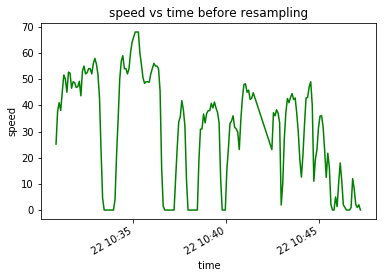

In [64]:
single_track[' Speed(km/h)'].plot(color = 'green')
plt.ylabel('speed')
plt.title('speed vs time before resampling')
plt.show()

In [65]:
#create a function that tkes a track object ,resamples by the specified option and return the resampled track.
def resample_tracks(track,columns ,option = 'S'):
    
    # default option is to resample by minutes 
    track_secondly = pd.DataFrame()
    interpolated = pd.DataFrame()
    
    #for column in columns:
    track_secondly =  track.resample(option)
    interpolated = track_secondly.interpolate(method='spline' , order = 2)

    return interpolated


In [66]:
#view resampled track 
resampled_single_track = resample_tracks(single_track ,columns = [' Speed(km/h)'] , option  =  'S')
resampled_single_track.head()

,id,CO2(kg/h),GPS Altitude(m),GPS HDOP(precision),GPS Bearing(deg),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude
time,,,,,,,,,,,,,,,,,,,
2019-03-22 10:30:52,5c94c14a44ea850302f2d7dd,7.933088,117.045541,0.648467,355.788510098233,3.375782,25.192772,20.578028,1325.203994,23.000000,0.700000,93.447799,1.000000,3.000000,49.999999,10.269411,88.077680,7.784031,51.638390
2019-03-22 10:30:53,NaN,7.922744,116.840822,0.658795,NaN,2.312072,28.684338,24.984603,1348.044517,14.414984,0.726715,91.423955,0.988568,2.430396,47.020745,10.272008,2.816024,7.773003,51.639282
2019-03-22 10:30:54,NaN,7.836696,116.707891,0.659226,NaN,2.309140,31.868220,28.910810,1371.351321,9.457486,0.726867,88.305078,0.988917,2.494360,46.985945,10.179463,-41.918145,7.773011,51.639364
2019-03-22 10:30:55,NaN,7.643123,116.600389,0.659656,NaN,2.306216,34.561154,32.278755,1395.093754,8.100459,0.727019,84.166526,0.989265,2.556887,46.951212,9.940044,-46.125814,7.773018,51.639445
2019-03-22 10:30:56,NaN,7.342024,116.518316,0.660086,NaN,2.303301,36.763141,35.088436,1419.271816,10.343902,0.727170,79.008301,0.989614,2.617975,46.916544,9.553751,-9.806981,7.773026,51.639526


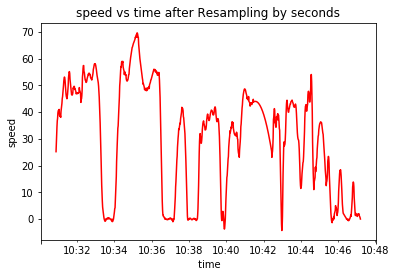

In [67]:
resampled_single_track[' Speed(km/h)'].plot(color = 'red')
plt.ylabel('speed')
plt.title('speed vs time after Resampling by seconds')
plt.show()

<p><span style="font-family: 'times new roman', times; font-size: 14pt;">variation of speed with time before and after resampling on same plot</span></p>

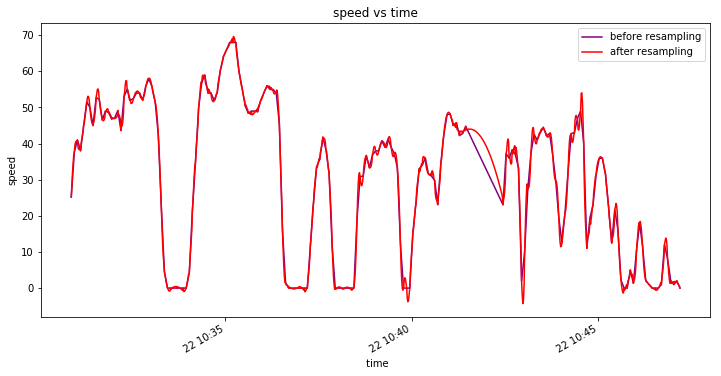

In [68]:
fig , ax = plt.subplots(figsize = (12,6))
single_track[' Speed(km/h)'].plot(ax = ax , color = 'purple' , label = 'before resampling')
resampled_single_track[' Speed(km/h)'].plot(ax = ax , color = 'red' , label = 'after resampling')
plt.ylabel('speed')
plt.title('speed vs time')
plt.legend()
plt.show()

<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Clustering tracks&nbsp;</span></strong></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">find and cluster tracks based on similarity of attributes such as average speed,average co2 emission, ,average stoptime, number of stops etc..(is this the right approach?)</span></em></p>



<p><span style="font-family: 'times new roman', times; font-size: large;">Here,as an example i will be clustering the tracks based on&nbsp; average speed</span></p>

<p><span><span>&nbsp;</span></span></p>
<div dir="ltr">
<table><colgroup><col width="108" /><col width="147" /></colgroup>
<tbody>
<tr>
<td>
<p dir="ltr"><span>Cluster </span></p>
</td>
<td>
<p dir="ltr"><span>Average speed</span></p>
</td>
</tr>
<tr>
<td>
<p dir="ltr"><span>1</span></p>
</td>
<td>
<p dir="ltr"><span>&lt;=20</span></p>
</td>
</tr>
<tr>
<td>
<p dir="ltr"><span>2</span></p>
</td>
<td>
<p dir="ltr"><span>&gt;20 and &lt;=40</span></p>
</td>
</tr>
<tr>
<td>
<p dir="ltr"><span>3</span></p>
</td>
<td>
<p dir="ltr"><span>&gt;40 and &lt;=60</span></p>
</td>
</tr>
<tr>
<td>
<p dir="ltr"><span>4</span></p>
</td>
<td>
<p dir="ltr"><span>&gt;60 and &lt;=80</span></p>
</td>
</tr>
<tr>
<td>
<p dir="ltr"><span>5</span></p>
</td>
<td>
<p dir="ltr"><span>&gt;80 </span></p>
</td>
</tr>
</tbody>
</table>
</div>

In [69]:
#divide the tracks into clusters as specified above
cluster1 = tracks.loc[tracks['avg_speed'] <= 20]
cluster2 = tracks.loc[np.logical_and((tracks['avg_speed'] > 20) , (tracks['avg_speed'] <= 40)) ]
cluster3 = tracks.loc[np.logical_and(tracks['avg_speed'] > 40  ,  tracks['avg_speed'] <= 60)]
cluster4 = tracks.loc[np.logical_and(tracks['avg_speed'] > 60  ,tracks['avg_speed'] <= 80)]
cluster5 = tracks.loc[tracks['avg_speed'] > 80 ]

#check the length of different clusters

print('number of tracks having average speed less than 20 = %d' %len(cluster1))
print('number of tracks having average speed beween 20 and 40 = %d' % len(cluster2))
print('number of tracks having average speed beween 40 and 60 = %d'  %len(cluster3))
print('number of tracks having average speed beween 60 and 80 = %d'  %len(cluster4))
print('number of tracks having average speed greater than 80 = %d ' %len(cluster5))

number of tracks having average speed less than 20 = 6
number of tracks having average speed beween 20 and 40 = 55
number of tracks having average speed beween 40 and 60 = 25
number of tracks having average speed beween 60 and 80 = 5
number of tracks having average speed greater than 80 = 9 


In [70]:
#view a sample cluster
cluster1.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed
17,5c93d26544ea8503020fcb4f,LINESTRING (7.825109476586911 51.6723600604205...,3,"[1.0, 1.0, 6.0]",2.67,11.4241
48,5c887e7044ea8503025ec462,LINESTRING (-79.77541664281819 36.073324754911...,2,"[1.0, 6.0]",3.5,15.4174
60,5c80e73344ea850302577bdc,LINESTRING (7.676661053497738 51.9303311754949...,4,"[9.0, 48.0, 52.0, 49.0]",39.5,17.92
63,5c718e9844ea85030245e824,LINESTRING (7.628404625127286 51.9549893903970...,7,"[51.0, 14.0, 56.0, 59.0, 36.0, 45.0, 11.0]",38.86,13.6657
82,5c6d775b44ea85030209ab6f,LINESTRING (7.659139024866016 51.9347320503097...,1,[36.0],36,0.8


<p><em><span style="font-size: large; font-family: 'times new roman', times;">&nbsp;</span></em></p>
<div dir="ltr"><em><span style="font-size: large; font-family: 'times new roman', times;">another method to classify the tracks is by using mapclassify</span></em></div>

In [71]:
#import mapclassify as mc(imported at the start)
y = tracks['avg_speed']

#divide the tracks into 5 equal intervals of average speed
classification = mc.Equal_Interval(y , k=5)

classification

             Equal Interval             
 
Lower            Upper             Count
         x[i] <= 20.593                7
20.593 < x[i] <= 40.386               54
40.386 < x[i] <= 60.178               25
60.178 < x[i] <= 79.971                5
79.971 < x[i] <= 99.764                9

<p><span style="font-family: terminal, monaco; font-size: large;">The above clustering of tracks was just an example,We can create a sophisticated function that can possibly cluster tracks based on any property into given number of clusters as well as plot the results .I intend to do this during GSOC period.</span></p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Temporal clustering of tracks</span></strong></p>
<p><span style="font-family: 'times new roman', times; font-size: large;"><em>group the tracks based on month</em></span></p>

<p><em><span style="font-family: terminal, monaco; font-size: large;">Below,i have just grouped the tracks based on their months.My idea is to further aggregate the tracks monthly.e.g: knowing the average speed(or any other phenomenon) in different months , number of tracks recorded in that month etc..</span></em></p>
<p><em><span style="font-family: terminal, monaco; font-size: large;">Another idea is to group the tracks based on their day.In this way we can distribute the tracks into different days.We could further classify days into weekdays and weekends.Then similar aggregation as above can be done here.</span></em></p>
<p><em><span style="font-family: terminal, monaco; font-size: large;">I will be doing the remaining part during GSOC.</span></em></p>
<p>&nbsp;</p>


In [72]:
#add respective month to tracks dataframe
tracks['month'] = None
for ind , row in tracks.iterrows():
    
    track_id = row['track_ids']
    track_data = import_single_track_info(track_id)
    track_data[' time'] = pd.to_datetime(track_data[' time'] , format ='%Y-%m-%dT%H:%M:%S' )
    
    date = track_data.loc[0 , ' time']
    month = date.strftime('%B')
    
    tracks.loc[ind ,'month'] = month
    
tracks.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed,month
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738,March
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1,[37.0],37,31.7012,March
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3,"[10.0, 34.0, 36.0]",26.67,29.9017,March
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5,"[36.0, 63.0, 21.0, 9.0, 36.0]",33,24.2392,March
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14,"[27.0, 20.0, 5.0, 14.0, 3.0, 4.0, 5.0, 23.0, 1...",17.43,71.7269,March


In [73]:
#make a copy of original dataframe
tracks_monthly = tracks.copy()

#set month as index
tracks_monthly.set_index('month' , inplace = True)

#group by the month
tracks_monthly = tracks_monthly.groupby('month')

<p><span style="font-family: 'times new roman', times; font-size: large;">As only 100 point were imported at the start the tracks got distributed into only two months i.e , march and february.</span></p>

In [74]:
for key, values in tracks_monthly:
    print(key)


February
March


<p>&nbsp;</p>
<p><span style="text-decoration: underline;"><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Congestion detection</span></strong></span></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">Here we would be finding a single value for a whole track that can help us in estimating the congestion in that track.This is just a flag to indicate that this track has been recorded while there could have been a lot of traffic. It doesn't tell where exactly the traffic flow was hampered or whether the reason for the resulting value was based on a break because of an receiving telephone call.</em></span></p>
<p>&nbsp;</p>

<p><span style="font-family: terminal, monaco; font-size: x-large;">This can be done in the following way</span></p>
<p><span style="font-size: large; font-family: 'times new roman', times;">-find actual travel time</span></p>
<p><span style="font-size: large; font-family: 'times new roman', times;">-find estimated travel time</span></p>
<p><span style="font-size: large; font-family: 'times new roman', times;">-calculate delay</span></p>
<p><span style="font-size: large; font-family: 'times new roman', times;">-use appropriate criterion to specify congestion</span></p>

<p>&nbsp;</p>

<p><span style="font-size: x-large;"><strong><span style="font-family: 'arial black', 'avant garde';">Actual travel time</span></strong></span></p>
<p>&nbsp;</p>


In [75]:
#find out actual travel time from the first and the last point of the track.
def cal_actual_travel_time(tracks):
    
    #an empty column to store the travel times
    tracks['actual_travel_time'] = None
    
    for ind , row in tracks.iterrows():
        
        track_id = row['track_ids']
        track_data = import_single_track_info(track_id)
        track_data[' time'] = pd.to_datetime(track_data[' time'] , format ='%Y-%m-%dT%H:%M:%S' )
        
        source_time = track_data.loc[0 , ' time']
        dest_time = track_data.loc[len(track_data)-1 , ' time']
        travel_time = (dest_time - source_time).total_seconds()
        
        tracks.loc[ind , 'actual_travel_time'] = travel_time


In [76]:
#remove warnings
pd.set_option('mode.chained_assignment', None)
cal_actual_travel_time(tracks)

#rename column
tracks.rename(columns = {'actual_travel_time' : 'actual_travel_time(sec)'} , inplace = True)
tracks.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed,month,actual_travel_time(sec)
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738,March,1380
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1,[37.0],37,31.7012,March,566
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3,"[10.0, 34.0, 36.0]",26.67,29.9017,March,604
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5,"[36.0, 63.0, 21.0, 9.0, 36.0]",33,24.2392,March,505
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14,"[27.0, 20.0, 5.0, 14.0, 3.0, 4.0, 5.0, 23.0, 1...",17.43,71.7269,March,4111


<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Estimated travel times</span></strong></p>
<p><span style="font-family: 'times new roman', times; font-size: large;"><em>find out the estimated travel times from source point to destination using OSRM</em></span></p>


<p><span style="font-family: 'times new roman', times; font-size: large;"><em>Here i have calculated the estimated travel time for only one track, A dedicated function to obtain estimated travel times for all the tracks will be done during GSOC</em></span></p>

In [79]:
#estimated travel time for first track id in tracks
url = 'http://router.project-osrm.org/table/v1/car/7.784031,51.638390;7.827673,51.675471?sources=0&destinations=1'

In [80]:
df = pd.read_json(url)
df

,durations,destinations,sources,code
0,[674.6],{'hint': 'wR7PiOgez4ghAAAAPgAAAAAAAABVAAAAQ1uk...,{'hint': 'LBAegC8QHoAEAAAADAAAABMAAACMAAAAiuVB...,Ok


In [81]:
df['durations']

0    [674.6]
Name: durations, dtype: object

In [82]:
time = df['durations'][0][0]
time

674.6

<p>&nbsp;</p>
<p><span style="font-family: 'times new roman', times; font-size: large;"><em>below we can see that the estimated travel time is 674.6 seonds whereas the actual travel time is 1380 seconds.</em></span></p>


In [83]:
tracks['estimated_travel_time(sec)'] = None
tracks.loc[0 ,  'estimated_travel_time(sec)'] = time
tracks[0:1]

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed,month,actual_travel_time(sec),estimated_travel_time(sec)
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738,March,1380,674.6


<p>&nbsp;</p>
<p>&nbsp;</p>
<p><span style="font-size: x-large;"><strong><span style="font-family: 'times new roman', times;">Specifying criterion to estimate congestion</span></strong></span></p>

<p><em><span style="font-size: large; font-family: 'times new roman', times;">The congestion would be based on two conditions</span></em></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">-if actual travel time is greater than the estimated travel time by a significant factor(default = 50%)</span></em></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">-if actual travel time is greater than the estimated travel time by a significant amount(which would be calculated from the length of tracks)</span></em></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;"></span></em></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">If the above conditions are satisfied ,then the congestion value would be something like(length of track/10)</span></em></p>
<p><em><span style="font-size: large; font-family: 'times new roman', times;">else the congestion value would be 1, indicating that there is no congestion.</span></em></p>

<p>&nbsp;</p>
<p><span style="font-family: 'times new roman', times; font-size: 14pt;">Add a function to load track lengths which would be useful to calculate the acceptable delay.</span></p>

In [92]:
def add_length(tracks , limit = 100, page = 0):
   
    #add a column to store track_ids
    tracks['length'] = None
    
    list_of_track_lengths = []
    
    url = 'https://envirocar.org/api/stable/rest/tracks' + '?limit=' + str(limit) + '&page=' + str(page)
    df = pd.read_json(url)
    
    #iterate through the rows of the dataframe and add track lengths to the list_of_track_lengths.
    for ind,row in df.iterrows():
        list_of_track_lengths.append(row['tracks']['length'])
    
    tracks['length'] = list_of_track_lengths
    
    return tracks
    

In [94]:
tracks = add_length(tracks)
tracks.head()

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed,month,actual_travel_time(sec),estimated_travel_time(sec),length
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738,March,1380,674.6,21.272115
1,5c9551a444ea850302f9c643,LINESTRING (7.663591859928062 51.9550915017678...,1,[37.0],37,31.7012,March,566,None,5.069901
2,5c9551a144ea850302f9c213,LINESTRING (7.688002093285968 51.9283432884615...,3,"[10.0, 34.0, 36.0]",26.67,29.9017,March,604,None,5.129512
3,5c95155944ea850302f58228,LINESTRING (7.63383899811732 51.95323285993519...,5,"[36.0, 63.0, 21.0, 9.0, 36.0]",33,24.2392,March,505,None,3.441505
4,5c950f9e44ea850302f542ef,LINESTRING (7.278693172916607 51.4529508797117...,14,"[27.0, 20.0, 5.0, 14.0, 3.0, 4.0, 5.0, 23.0, 1...",17.43,71.7269,March,4111,None,82.239187


In [102]:
#similar to the previous case i would be calculating the congestion value for only one track here

def detect_congestion(tracks, threshold1 = 50):
    #threshold1 indicates the significant factor(DEFAULT = 50%) and threshold2 indicates the significant amount
    
    tracks['congestion'] = None
    #print(track.head())
    for ind, row in  tracks[0:1].iterrows():
        
        threshold2 = row['length'] / 10
        
        if row['actual_travel_time(sec)'] > (1+threshold1/100) * row['estimated_travel_time(sec)'] and row['actual_travel_time(sec)'] - row['estimated_travel_time(sec)'] > threshold2:
            
            tracks.loc[ind , 'congestion'] = round((row['actual_travel_time(sec)'] - row['estimated_travel_time(sec)']) / row['estimated_travel_time(sec)'] , 2)

        else:
            tracks.loc[ind , 'congestion'] = 1
        
    return tracks
        

In [104]:
tracks = detect_congestion(tracks)
tracks[0:1]

,track_ids,polyline,number_of_stops,stoptimes,avg_stoptime(sec),avg_speed,month,actual_travel_time(sec),estimated_travel_time(sec),length,congestion
0,5c9b0b6d44ea85030284ee9d,LINESTRING (7.684440320339072 51.5548821465228...,4,"[31.0, 26.0, 11.0, 71.0]",34.75,56.7738,March,1380,674.6,21.272115,1.05


<p>&nbsp;</p>
<p>&nbsp;</p>
<p><strong><span style="font-family: 'arial black', 'avant garde'; font-size: x-large;">Detecting Hotspots</span></strong></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">Visualizing the statistically significant areas.These can be the areas where emssion of CO2 is high, congestion is high,etc..</span></em></p>
<p><em><span style="font-family: 'times new roman', times; font-size: large;">Here i have detected the areas containing tracks with high average speed.</span></em></p>
<p>&nbsp;</p>

In [116]:
def detect_hotspots(tracks , column = 'avg_speed' , threshold = 40):
    
    #seperate all the tracks having average co2 emission greater than the threshold
    hotspots = tracks[tracks['avg_speed'] > threshold]
    
    #visualize hotspots on a folium heatmap
    m = folium.Map(location = [51.1657 , 10.4515] ,  zoom_start = 7 , control_scale = True)

    for ind,row  in hotspots.iterrows():
        track_id = row['track_ids']
        
        track_data = import_single_track_info(track_id)
        points_arr = track_data[[' latitude' , ' longitude']].values
        
        HeatMap(points_arr).add_to(m)
        
    #return map
    return m

In [117]:
m = detect_hotspots(tracks,column = 'avg_speed')
m

<p><em><span style="font-family: 'times new roman', times; font-size: large;">The above hotspots indicate the tracks where the average speed is greater than the given threshold</span></em></p>
<p>&nbsp;</p>
<p>&nbsp;</p>